In [2]:
import numpy as np
import networkx as nx

In [24]:
second_indices = []
excluded_indices=[]
base_index = 0
excluded_indices.append(base_index)
v=3
e=(v-1)*2
m_dis=v+e
q_dis=m_dis+v
def create_connected_graph(n):
    G = nx.path_graph(n)
    return G
def add_random_edge(G):
        nodes = list(G.nodes())
        n = len(nodes)
        max_edges = n * (n - 1) // 2  # Maximum number of edges in a complete graph

        if G.number_of_edges() == max_edges:
            print("Already a complete graph")
            return

        while True:
            u, v = np.random.choice(nodes, 2, replace=False)  # Randomly select two distinct nodes
            if not G.has_edge(u, v):  # Check if the edge does not already exist
                G.add_edge(u, v)  # Add the new edge to the graph
                break  # Exit the loop once a new edge is added
def increase_edge_connectivity(G, target_connectivity):
        """
        Increase the edge connectivity of the graph G to the target_connectivity.
        """
        current_connectivity = nx.edge_connectivity(G)
        
        while current_connectivity < target_connectivity:
            add_random_edge(G)
            current_connectivity = nx.edge_connectivity(G)  
graph=create_connected_graph(v) 
# graph=nx.complete_graph(v)
#while graph.number_of_edges() <= (v * (v - 1)) // 2:
#increase_edge_connectivity(graph, 3)
for i in range(v-1):
    neighbors_ex = sorted(graph.neighbors(i))
    base_index += len(neighbors_ex)+1
    excluded_indices.append(base_index)
first_indices = [i for i in np.arange(m_dis) if i not in excluded_indices]
node_to_index = {node: v + 2 * len(graph.edges) + idx for idx, node in enumerate(graph.nodes())}

for i in range(v):
    neighbors = sorted(graph.neighbors(i))
    # print(neighbors)
    for j in neighbors:
            # Update second_indices using the mapping
        second_indices.append(node_to_index[j])
# print(excluded_indices)
# print(first_indices)
# print(second_indices)
# Create pairs using broadcasting
pairs = np.transpose([first_indices, second_indices])
# print('pairs: \n',pairs)
# Initialize the kernel matrix M
M = np.zeros(( len(pairs), q_dis))
# Assign -1 and 1 to the corresponding places in M
for i, (idx1, idx2) in enumerate(pairs):
    M[i, idx1] = -1
    M[i, idx2] = 1
M_inv=np.linalg.inv(M@M.T)  
print('M:\n',M)
for i in range(M.shape[0]):
    print((M@M.T)[i,:])
print('M_inv',M_inv)
#print('Inter:\n',M.T@M_inv@M)
#print('Projection:\n',np.eye(M.shape[1])-M.T@M_inv@M)
P=np.eye(M.shape[1])-M.T@M_inv@M
print('Projection:\n',P)
print('Projection square:\n',P@P-P)
# for i in range(M.shape[0]):
    # print(P@M.T[:,i])
print(P@M.T)
np.max(P@M.T)
eigenvalues, _=np.linalg.eig(np.linalg.inv(M@M.T))
print('eigen',eigenvalues)

M:
 [[ 0. -1.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  1.  0.]]
[2. 0. 0. 1.]
[0. 2. 0. 0.]
[0. 0. 2. 0.]
[1. 0. 0. 2.]
M_inv [[ 0.66666667  0.          0.         -0.33333333]
 [ 0.          0.5         0.          0.        ]
 [ 0.          0.          0.5         0.        ]
 [-0.33333333  0.          0.          0.66666667]]
Projection:
 [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.         0.
  0.33333333 0.         0.33333333 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.5        0.         0.
  0.         0.5        0.         0.        ]
 [0.         0.         0.         0.         0.5        0.
  0.         0.         0.         0.5       ]
 [0.    

In [5]:
B=np.array([[-1,1],[1,-1]])
B@B.T

array([[ 2, -2],
       [-2,  2]])

In [ ]:
data = np.load('mfddata.npy')

# Assuming the data is in the form of two columns: [density, flow]
densities = data[:, 0]  # First column
flows = data[:, 1]      # Second column

# Create the scatter plot
plt.scatter(densities, flows, alpha=0.5, edgecolors='w', s=100)
plt.xlabel('Average Density (veh/km)')
plt.ylabel('Average Flow (veh/hr)')
plt.title('Macroscopic Fundamental Diagram (MFD)')
plt.grid(True)
plt.show()

In [12]:
pwd

'D:\\Thesis\\unjam\\power_unit'

In [ ]:
data = np.load('mfddata.npy')

# Assuming the data is in the form of two columns: [density, flow]
densities = data[:, 0]  # First column
flows = data[:, 1]      # Second column

# Create the scatter plot
plt.scatter(densities, flows, alpha=0.5, edgecolors='w', s=100)
plt.xlabel('Average Density (veh/km)')
plt.ylabel('Average Flow (veh/hr)')
plt.title('Macroscopic Fundamental Diagram (MFD)')
plt.grid(True)
plt.show()

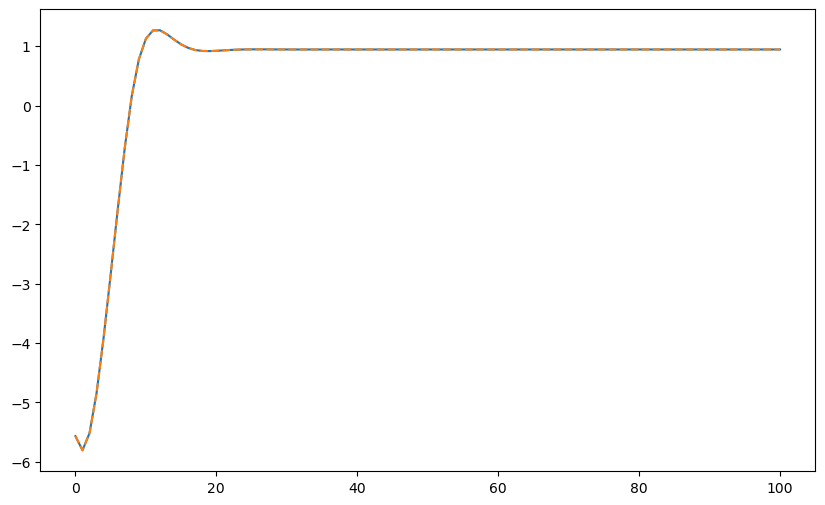

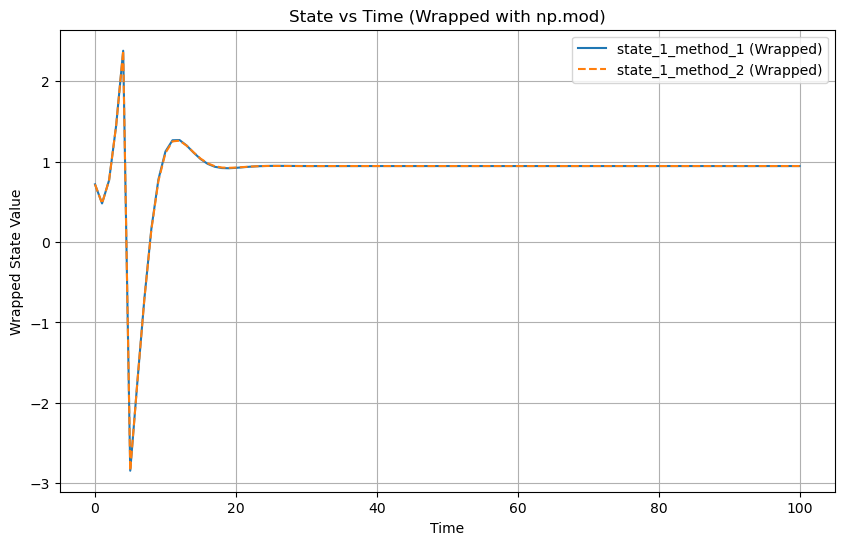

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('state_trajectories_box.csv')
data
# # Extract time and state columns
time = data['time']  # Assuming there is a 'time' column
state_1_method_1 = data['state_1_method_1']
state_1_method_2 = data['state_1_method_2']

# Apply np.mod to wrap the states between [-pi, pi]
wrapped_state_1_method_1 = np.mod(state_1_method_1 + np.pi, 2 * np.pi) - np.pi
wrapped_state_1_method_2 = np.mod(state_1_method_2 + np.pi, 2 * np.pi) - np.pi

plt.figure(figsize=(10, 6))
plt.plot(time, state_1_method_1, label='state_1_method_1 (Wrapped)')
plt.plot(time, state_1_method_1, label='state_1_method_2 (Wrapped)', linestyle='--')
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time, wrapped_state_1_method_1, label='state_1_method_1 (Wrapped)')
plt.plot(time, wrapped_state_1_method_2, label='state_1_method_2 (Wrapped)', linestyle='--')

# Labels and title
plt.xlabel('Time')
plt.ylabel('Wrapped State Value')
plt.title('State vs Time (Wrapped with np.mod)')
plt.legend()
plt.grid(True)
# plt.show()

In [4]:
import numpy as np
import control

# System matrices (example system)
A = np.array([[1.1, 0.1], 
              [0, 1]])
B = np.array([[0.1], 
              [1]])

# Cost matrices
Q = np.eye(2)  # State cost matrix
R = np.eye(1)  # Control input cost matrix

# Reference trajectory (constant for simplicity)
x_ref = np.array([10, 0])

# Solve the LQR problem to obtain feedback gain K and the Riccati matrix P
K, P, _ = control.lqr(A, B, Q, R)

# Calculate the feedforward term to handle the non-zero reference
u_ff = -np.linalg.inv(R + B.T @ P @ B) @ B.T @ P @ (A - np.eye(2)) @ x_ref

# Simulation using the computed control law
def simulate_lqr_tracking(x0, num_steps):
    """
    Simulates the system under LQR control with reference tracking.

    Args:
        x0 (np.array): Initial state.
        num_steps (int): Number of simulation steps.

    Returns:
        np.array: History of state trajectories.
        np.array: History of control inputs.
    """
    x_history = [x0]
    u_history = []

    for _ in range(num_steps):
        # Deviation from reference
        delta_x = x_history[-1] - x_ref

        # Control input
        u_opt = -K @ delta_x + u_ff
        u_history.append(u_opt)

        # Update state
        x_next = A @ x_history[-1] + B @ u_opt
        x_history.append(x_next)

    return np.array(x_history), np.array(u_history)

# Initial state
x0 = np.array([1, 0])

# Number of simulation steps
num_steps = 20

# Run the simulation
x_history, u_history = simulate_lqr_tracking(x0, num_steps)

# Print results
print("State trajectory using LQR with tracking:")
print(x_history)
print("Control inputs using LQR with tracking:")
print(u_history)


ModuleNotFoundError: No module named 'control'

edges [(0, 4), (0, 1), (1, 5), (1, 2), (2, 6), (2, 3), (3, 7), (4, 8), (4, 5), (5, 9), (5, 6), (6, 10), (6, 7), (7, 11), (8, 12), (8, 9), (9, 13), (9, 10), (10, 14), (10, 11), (11, 15), (12, 13), (13, 14), (14, 15)]


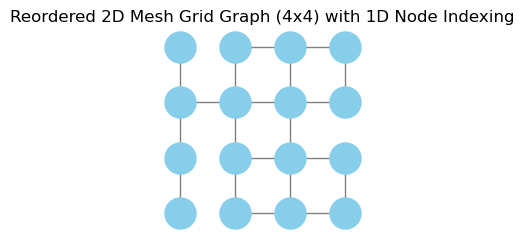

Neighbors of node 0: [4]
Neighbors of node 1: [5, 2]
Neighbors of node 2: [1, 6, 3]
Neighbors of node 3: [2, 7]
Neighbors of node 4: [0, 8]
Neighbors of node 5: [1, 9, 6]
Neighbors of node 6: [2, 5, 10, 7]
Neighbors of node 7: [3, 6]
Neighbors of node 8: [4, 12, 9]
Neighbors of node 9: [5, 8, 13, 10]
Neighbors of node 10: [6, 9, 14, 11]
Neighbors of node 11: [10, 15]
Neighbors of node 12: [8]
Neighbors of node 13: [9, 14]
Neighbors of node 14: [10, 13, 15]
Neighbors of node 15: [11, 14]


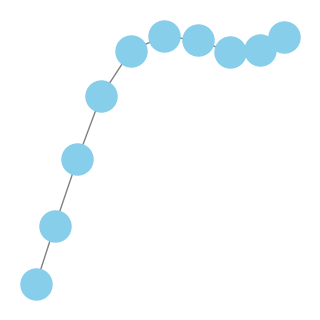

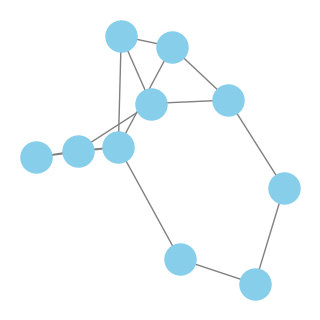

In [16]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

def create_reordered_mesh_graph(m, n):
    # Create a 2D grid graph (mesh grid)
    G_2d = nx.grid_2d_graph(m, n)
    
    # Map 2D coordinates (i, j) to 1D indices
    mapping = {(i, j): i * n + j for i in range(m) for j in range(n)}
    
    # Relabel the nodes to 1D ordering
    G_1d = nx.relabel_nodes(G_2d, mapping)
    
    return G_1d
def add_random_edges2(G, num_edges=10):

    nodes = list(G.nodes())
    n = len(nodes)
    max_edges = n * (n - 1) // 2  # Maximum number of edges in a complete graph

    if G.number_of_edges() >= max_edges:
        print("Already a complete graph or cannot add more edges.")
        return

    existing_edges = set(G.edges())
    possible_edges = [(u, v) for u in nodes for v in nodes if u != v and (u, v) not in existing_edges and (v, u) not in existing_edges]

    if len(possible_edges) < num_edges:
        print("Not enough possible edges to add.")
        return

    edges_to_add = np.random.choice(len(possible_edges), num_edges, replace=False)
    
    for idx in edges_to_add:
        u, v = possible_edges[idx]
        G.add_edge(u, v)
# Define the grid size (m x n)
m, n = 4, 4  # You can change m and n to any desired grid size

# Create the reordered mesh graph
G = create_reordered_mesh_graph(m, n)
#randomly remove some edges
edges = list(G.edges())
print('edges',edges)
num_edges_to_remove = int(len(edges) * 0.2)  # Remove 30% of edges
edges_to_remove = random.sample(edges, num_edges_to_remove)
G.remove_edges_from(edges_to_remove)

# Plot the reordered graph
plt.figure(figsize=(2, 2))
pos = {i: (i % n, i // n) for i in range(m * n)}  # Reconstruct the 2D positions for visualization
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=500, edge_color='gray', font_size=10)
plt.title(f'Reordered 2D Mesh Grid Graph ({m}x{n}) with 1D Node Indexing')
plt.show()

# Example: Print neighbors for each node in 1D ordering
for i in range(m * n):
    print(f"Neighbors of node {i}: {list(G.neighbors(i))}")

graph = nx.path_graph(10)
plt.figure(figsize=(3, 3))
nx.draw(graph, with_labels=False, node_color='skyblue', node_size=500, edge_color='gray', font_size=10)
plt.show()

num_nodes = 10
edge_prob = 0.2
graph2 = nx.path_graph(10)
add_random_edges2(graph2,5)
# graph2 = nx.cycle_graph(10)
plt.figure(figsize=(3, 3))
nx.draw(graph2, with_labels=False, node_color='skyblue', node_size=500, edge_color='gray', font_size=10)
plt.show()



In [13]:
import numpy as np
from scipy.linalg import svd
from numpy.linalg import norm

def orthogonal_complement(basis, n):
    """Find the orthogonal complement of the subspace defined by the given basis in R^n."""
    # Pad the basis to be in R^n (if necessary)
    if basis.shape[0] < n:
        padded_basis = np.vstack([basis, np.zeros((n - basis.shape[0], basis.shape[1]))])
    else:
        padded_basis = basis
    # Compute the orthogonal complement using SVD
    U, S, Vh = svd(padded_basis)
    rank = np.sum(S > 1e-10)
    return Vh[rank:].T  # Columns of Vh.T form the orthogonal complement

def friedrichs_angle(C_basis, D_basis):
    """Compute the Friedrichs angle between subspaces spanned by C_basis and D_basis."""
    
    # Ensure that both subspaces are in the same ambient space (R^n)
    n = max(C_basis.shape[0], D_basis.shape[0])
    
    # Orthogonal complements of the intersection
    C_intersect_D_basis = np.hstack([C_basis, D_basis])  # Concatenate the basis vectors
    C_perp = orthogonal_complement(C_intersect_D_basis, n)
    D_perp = orthogonal_complement(C_intersect_D_basis, n)
    
    # Maximize |<x, y>| over unit vectors in these subspaces
    max_inner_product = 0
    for i in range(C_perp.shape[1]):
        for j in range(D_perp.shape[1]):
            x = C_perp[:, i] / norm(C_perp[:, i])
            y = D_perp[:, j] / norm(D_perp[:, j])
            inner_product = abs(np.dot(x, y))
            max_inner_product = max(max_inner_product, inner_product)
    
    # Friedrichs angle
    theta = np.arccos(max_inner_product)
    return theta

# Example: Define basis for subspace C (5-dimensional) and subspace D (2-dimensional)
# Subspace C: A 5D subspace spanned by 5 orthonormal vectors in R^5
C_basis = np.array([[1, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0],
                    [0, 0, 1, 0, 0],
                    [0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1]])

# Subspace D: Now let's take a rotated 2D subspace in R^5 to avoid direct overlap with C.
# Example: Subspace spanned by [1/sqrt(2), 1/sqrt(2), 0, 0, 0] and [0, 0, 1, 0, 0]
D_basis = np.array([[1/np.sqrt(2), 0],
                    [1/np.sqrt(2), 0],
                    [0, 1],
                    [0, 0],
                    [0, 0]])
# Compute the Friedrichs angle between C and D
theta = friedrichs_angle(C_basis, D_basis)
print("Friedrichs angle (in radians):", theta)
print("Friedrichs angle (in degrees):", np.degrees(theta))


Friedrichs angle (in radians): 0.0
Friedrichs angle (in degrees): 0.0


In [19]:
import numpy as np
from scipy.linalg import solve_discrete_are
import time

# System matrices
A = np.array([[1, 0.1],
              [-0.5, 0.7]])
B = np.array([[0], [1]])
C = np.array([[0.25, 0]])
D = np.zeros((1, 1))

# Tracking setup
y_ref = np.array([[0.25]])   # Reference output as a 2D array
N = 5                        # Time horizon for the control sequence

# Cost matrices (penalize deviations from y_ref and control effort)
Q = C.T @ C                  # State cost to penalize output deviation
R = np.array([[0.1]])        # Control cost

# Start timer for runtime measurement
start_time = time.time()

# Solve discrete-time Algebraic Riccati Equation (ARE) for optimal gain matrix
P = solve_discrete_are(A, B, Q, R)
K = np.linalg.inv(R + B.T @ P @ B) @ (B.T @ P @ A)

# Control sequence calculation for initial state
def compute_control_sequence(x0, y_ref, N):
    x = x0
    u_sequence = []
    x_ref = np.linalg.pinv(C) @ y_ref  # Target state that corresponds to y_ref

    for _ in range(N):
        # Compute control action u_k = -K(x_k - x_ref) for tracking y_ref
        u = -K @ (x - x_ref)
        u_sequence.append(u)
        # Update state using system dynamics
        x = A @ x + B @ u
    return u_sequence

# Initial state
x0 = np.array([[0], [0]])  # Starting from the origin

# Calculate control sequence
u_sequence = compute_control_sequence(x0, y_ref, N)

# Measure runtime
runtime = time.time() - start_time

# Output results
print("Optimal gain matrix, K:")
print(K)
print("Control sequence to track y_ref over N steps:")
for k, u in enumerate(u_sequence):
    print(f"Step {k + 1}: u = {u.flatten()[0]}")
print(f"Runtime: {runtime:.6f} seconds")


Optimal gain matrix, K:
[[0.37119618 0.13656295]]
Control sequence to track y_ref over N steps:
Step 1: u = 0.3711961762003593
Step 2: u = 0.3205045308839467
Step 3: u = 0.2781643197282512
Step 4: u = 0.24494585274535646
Step 5: u = 0.22055557738442927
Runtime: 0.398238 seconds
